# Example

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Happiness

I was reading [Happiness and Life Satisfaction](https://ourworldindata.org/happiness-and-life-satisfaction)
by Esteban Ortiz-Ospina and Max Roser, which discusses (among many other things) the relationship between income and happiness, both between countries, within countries, and over time.

It cites the [World Happiness Report](https://worldhappiness.report/), which I skimmed looking for examples of multiple regression and sources of data.

Their [Table 2.1](https://worldhappiness.report/ed/2020/social-environments-for-world-happiness/) reports the result of a multiple regression analysis that explore the relationship between happiness and six potentially predictive factors:

* Income as represented by per capita GDP (keeping in mind the limitations of this statistic).

* Social support

* Healthy life expectancy at birth

* Freedom to make life choices

* Generosity

* Perceptions of corruption

A "Technical Box" on the same page explains each of these predictors.

The dependent variable, happiness, is the national average of responses to the "Cantril ladder question" used by the [Gallup World Poll](https://news.gallup.com/poll/122453/understanding-gallup-uses-cantril-scale.aspx):

> Please imagine a ladder with steps numbered from zero at the bottom to 10 at the top.
The top of the ladder represents the best possible life for you and the bottom of the ladder represents the worst possible life for you.
On which step of the ladder would you say you personally feel you stand at this time?  

The data used to make this table can be [downloaded from here](https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls).

In [1]:
# Get the data file

import os

filename = 'WHR20_DataForFigure2.1.xls'
if not os.path.exists(filename):
    !wget https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls

--2020-10-28 11:53:01--  https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls
Resolving happiness-report.s3.amazonaws.com (happiness-report.s3.amazonaws.com)... 52.216.242.20
Connecting to happiness-report.s3.amazonaws.com (happiness-report.s3.amazonaws.com)|52.216.242.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83968 (82K) [application/vnd.ms-excel]
Saving to: ‘WHR20_DataForFigure2.1.xls’

WHR20_DataForFigure 100%[===================>]  82.00K  --.-KB/s    in 0.05s   

2020-10-28 11:53:01 (1.71 MB/s) - ‘WHR20_DataForFigure2.1.xls’ saved [83968/83968]



Now we can read the data into a Pandas `DataFrame`.

In [6]:
df = pd.read_excel(filename)
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8087,0.031156,7.869766,7.747634,10.639267,0.954330,71.900826,0.949172,-0.059482,0.195445,1.972317,1.285190,1.499526,0.961271,0.662317,0.159670,0.477857,2.762835
1,Denmark,Western Europe,7.6456,0.033492,7.711245,7.579955,10.774001,0.955991,72.402504,0.951444,0.066202,0.168489,1.972317,1.326949,1.503449,0.979333,0.665040,0.242793,0.495260,2.432741
2,Switzerland,Western Europe,7.5599,0.035014,7.628528,7.491272,10.979933,0.942847,74.102448,0.921337,0.105911,0.303728,1.972317,1.390774,1.472403,1.040533,0.628954,0.269056,0.407946,2.350267
3,Iceland,Western Europe,7.5045,0.059616,7.621347,7.387653,10.772559,0.974670,73.000000,0.948892,0.246944,0.711710,1.972317,1.326502,1.547567,1.000843,0.661981,0.362330,0.144541,2.460688
4,Norway,Western Europe,7.4880,0.034837,7.556281,7.419719,11.087804,0.952487,73.200783,0.955750,0.134533,0.263218,1.972317,1.424207,1.495173,1.008072,0.670201,0.287985,0.434101,2.168266


### Ladder scores

In [9]:
ladder = df['Ladder score']
ladder.describe()

count    153.00000
mean       5.47324
std        1.11227
min        2.56690
25%        4.72410
50%        5.51500
75%        6.22850
max        7.80870
Name: Ladder score, dtype: float64

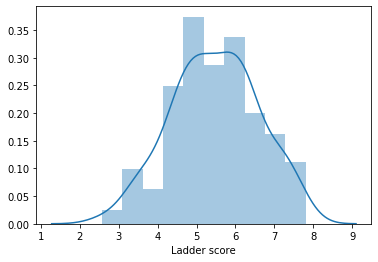

In [22]:

sns.distplot(ladder);

### GDP

In [17]:
log_gdp = df['Logged GDP per capita']
log_gdp.describe()

count    153.000000
mean       9.295706
std        1.201588
min        6.492642
25%        8.350645
50%        9.456313
75%       10.265124
max       11.450681
Name: Logged GDP per capita, dtype: float64

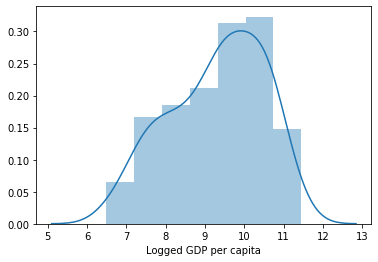

In [24]:
sns.distplot(log_gdp);

Text(0, 0.5, 'Happiness ladder score')

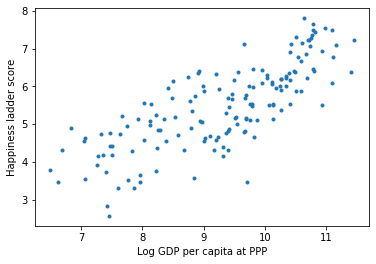

In [15]:
plt.plot(log_gdp, ladder, '.')

plt.xlabel('Log GDP per capita at PPP')
plt.ylabel('Happiness ladder score')

In [16]:
from scipy.stats import linregress

linregress(log_gdp, ladder)

LinregressResult(slope=0.717738495630452, intercept=-1.1986460618088843, rvalue=0.7753744007429199, pvalue=5.983050807797873e-32, stderr=0.047570849726545426)

### Social support

In [25]:
social = df['Social support']
social.describe()

count    153.000000
mean       0.808721
std        0.121453
min        0.319460
25%        0.737217
50%        0.829204
75%        0.906747
max        0.974670
Name: Social support, dtype: float64

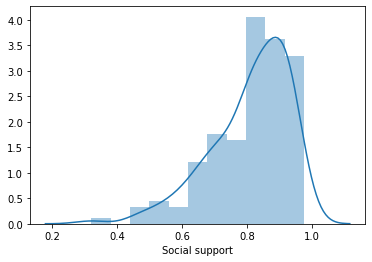

In [26]:
sns.distplot(social);

Text(0, 0.5, 'Happiness ladder score')

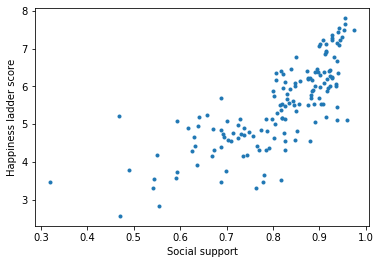

In [29]:
plt.plot(social, ladder, '.')

plt.xlabel('Social support')
plt.ylabel('Happiness ladder score')

In [28]:
from scipy.stats import linregress

linregress(social, ladder)

LinregressResult(slope=7.00588417622924, intercept=-0.19256627354733435, rvalue=0.765000756591807, pvalue=1.177169593901948e-30, stderr=0.4799746435701384)

### Healthy life expectancy

In [30]:
life_exp = df['Healthy life expectancy']
life_exp.describe()

count    153.000000
mean      64.445529
std        7.057848
min       45.200001
25%       58.961712
50%       66.305145
75%       69.289192
max       76.804581
Name: Healthy life expectancy, dtype: float64

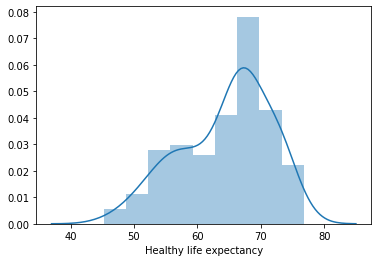

In [31]:
sns.distplot(life_exp);

Text(0, 0.5, 'Happiness ladder score')

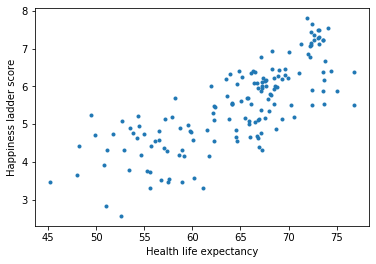

In [32]:
plt.plot(life_exp, ladder, '.')

plt.xlabel('Health life expectancy')
plt.ylabel('Happiness ladder score')

In [33]:
from scipy.stats import linregress

linregress(life_exp, ladder)

LinregressResult(slope=0.12139675973726681, intercept=-2.350238557323147, rvalue=0.770316289885804, pvalue=2.6080112560335427e-31, stderr=0.00817786749540784)

### Freedom to make life choices

In [34]:
freedom = df['Freedom to make life choices']
freedom.describe()

count    153.000000
mean       0.783360
std        0.117786
min        0.396573
25%        0.714839
50%        0.799805
75%        0.877709
max        0.974998
Name: Freedom to make life choices, dtype: float64

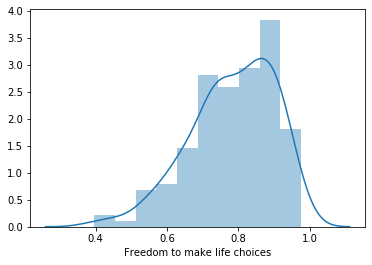

In [35]:
sns.distplot(freedom);

Text(0, 0.5, 'Happiness ladder score')

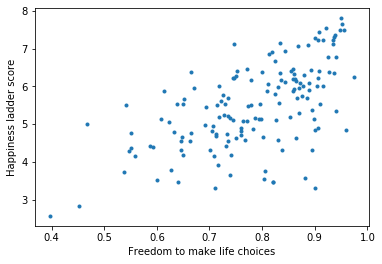

In [36]:
plt.plot(freedom, ladder, '.')

plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness ladder score')

In [37]:
from scipy.stats import linregress

linregress(freedom, ladder)

LinregressResult(slope=5.5770786820409475, intercept=1.1043785605828598, rvalue=0.5905967827668821, pvalue=9.34328686682437e-16, stderr=0.6201302211087694)

### Generosity

In [38]:
generosity = df['Generosity']
generosity.describe()

count    153.000000
mean      -0.014568
std        0.151809
min       -0.300907
25%       -0.127015
50%       -0.033665
75%        0.085429
max        0.560664
Name: Generosity, dtype: float64

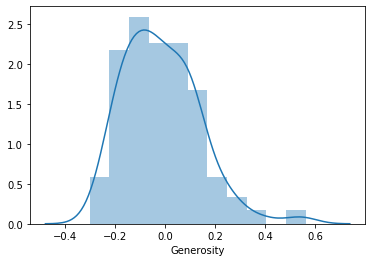

In [39]:
sns.distplot(generosity);

Text(0, 0.5, 'Happiness ladder score')

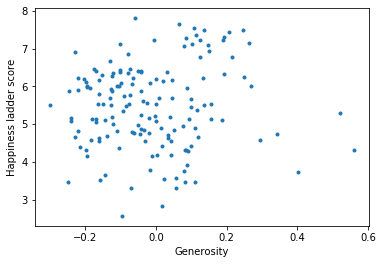

In [40]:
plt.plot(generosity, ladder, '.')

plt.xlabel('Generosity')
plt.ylabel('Happiness ladder score')

In [41]:
from scipy.stats import linregress

linregress(generosity, ladder)

LinregressResult(slope=0.5058641239624758, intercept=5.48060944691137, rvalue=0.06904312651151728, pvalue=0.39642391116772036, stderr=0.5948224496625005)

### Perceptions of corruption

In [42]:
corruption = df['Perceptions of corruption']
corruption.describe()

count    153.000000
mean       0.733120
std        0.175172
min        0.109784
25%        0.683019
50%        0.783122
75%        0.849151
max        0.935585
Name: Perceptions of corruption, dtype: float64

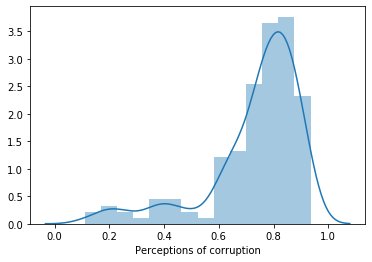

In [44]:
sns.distplot(corruption);

Text(0, 0.5, 'Happiness ladder score')

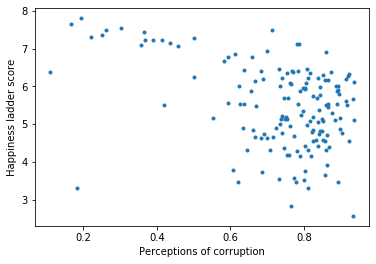

In [45]:
plt.plot(corruption, ladder, '.')

plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness ladder score')

In [46]:
from scipy.stats import linregress

linregress(corruption, ladder)

LinregressResult(slope=-2.656058847626281, intercept=7.420450311909139, rvalue=-0.4183050872675625, pvalue=7.427593927170636e-08, stderr=0.46934104524881665)

In [47]:
subset = pd.DataFrame()

subset['ladder'] = df['Ladder score']
subset['log_gdp'] = df['Logged GDP per capita']
subset['social'] = df['Social support']
subset['life_exp'] = df['Healthy life expectancy']
subset['freedom'] = df['Freedom to make life choices']
subset['generosity'] = df['Generosity']
subset['corruption'] = df['Perceptions of corruption']

subset.corr()

,ladder,log_gdp,social,life_exp,freedom,generosity,corruption
ladder,1.000000,0.775374,0.765001,0.770316,0.590597,0.069043,-0.418305
log_gdp,0.775374,1.000000,0.781814,0.848469,0.419019,-0.118399,-0.334729
social,0.765001,0.781814,1.000000,0.742744,0.478863,-0.056780,-0.210530
life_exp,0.770316,0.848469,0.742744,1.000000,0.448846,-0.071852,-0.353841
freedom,0.590597,0.419019,0.478863,0.448846,1.000000,0.253721,-0.420145
generosity,0.069043,-0.118399,-0.056780,-0.071852,0.253721,1.000000,-0.278480
corruption,-0.418305,-0.334729,-0.210530,-0.353841,-0.420145,-0.278480,1.000000


In [53]:
import statsmodels.formula.api as smf

formula = 'ladder ~ log_gdp + social'

results = smf.ols(formula, data=subset).fit()
results.params

Intercept   -1.475994
log_gdp      0.422124
social       3.740835
dtype: float64

[Article about standardizing](https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc)

In [57]:
subset.mean()

ladder         5.473240
log_gdp        9.295706
social         0.808721
life_exp      64.445529
freedom        0.783360
generosity    -0.014568
corruption     0.733120
dtype: float64

In [58]:
subset.std()

ladder        1.112270
log_gdp       1.201588
social        0.121453
life_exp      7.057848
freedom       0.117786
generosity    0.151809
corruption    0.175172
dtype: float64

In [59]:
normalized = (subset - subset.mean()) / subset.std()

In [60]:
normalized.mean()

ladder       -4.934325e-16
log_gdp       7.923945e-16
social       -5.253604e-16
life_exp     -5.688986e-16
freedom      -3.628180e-16
generosity   -3.337925e-17
corruption   -1.407734e-16
dtype: float64

In [61]:
normalized.std()

ladder        1.0
log_gdp       1.0
social        1.0
life_exp      1.0
freedom       1.0
generosity    1.0
corruption    1.0
dtype: float64

In [72]:
formula = 'ladder ~ log_gdp'

results = smf.ols(formula, data=normalized).fit()
results.params

Intercept   -3.105155e-16
log_gdp      7.753744e-01
dtype: float64

In [73]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 ladder   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     227.6
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           5.98e-32
Time:                        13:51:35   Log-Likelihood:                -146.27
No. Observations:                 153   AIC:                             296.5
Df Residuals:                     151   BIC:                             302.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.105e-16      0.051  -6.06e-15      1.000      -0.101       0.101
log_gdp        0.7754      0.051     15.088      0.000       0.674       0.877
==============================================================================
Omnibus:                        2.646   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.266   Jarque-Bera (JB):                2.697
Skew:                          -0.297   Prob(JB):                        0.260
Kurtosis:                       2.737   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""